# Data Preprocessing

# 1.Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.import dataset

In [41]:
df=pd.read_csv("Titanic-Dataset.csv")

In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.corr()

C:\Users\saisa\AppData\Local\Temp\ipykernel_17732\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.corr().Fare.sort_values(ascending=False)

C:\Users\saisa\AppData\Local\Temp\ipykernel_17732\60082530.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Fare.sort_values(ascending=False)


Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

# 3.checking for null values

In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

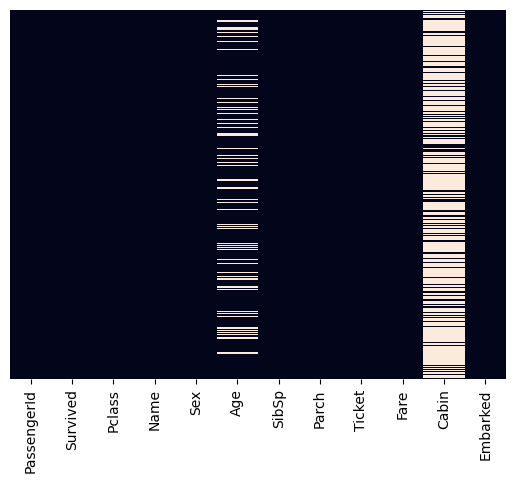

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [43]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [45]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [46]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

# 4.data visualization

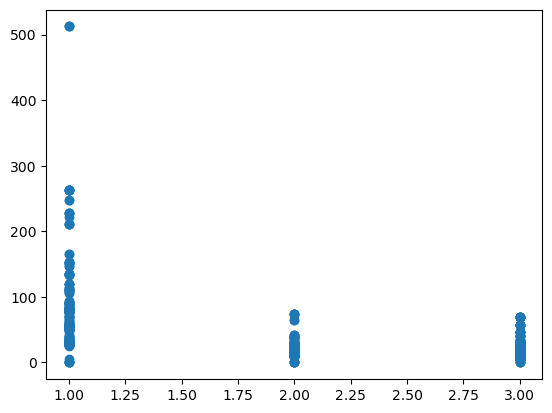

In [47]:
plt.scatter(df["Pclass"],df["Fare"])

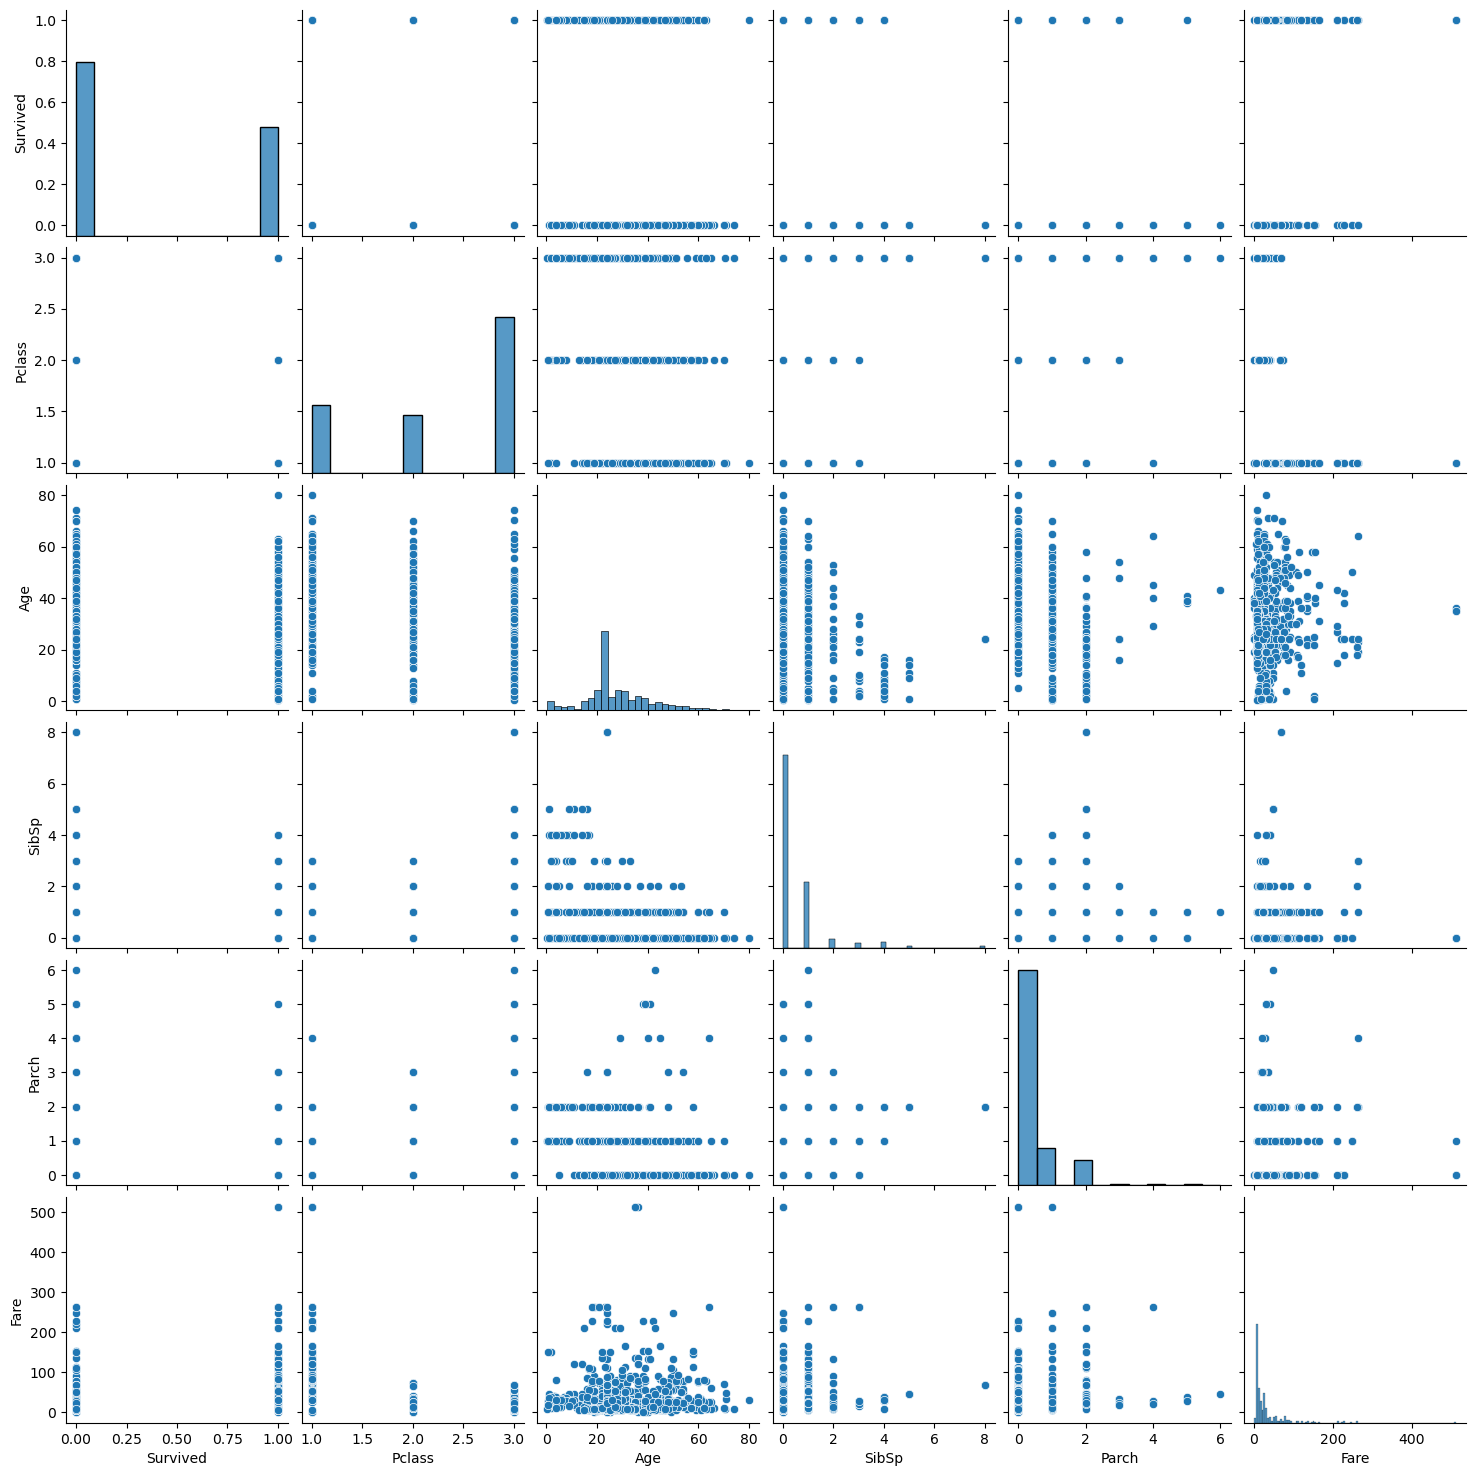

In [48]:
sns.pairplot(df)

C:\Users\saisa\AppData\Local\Temp\ipykernel_17732\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

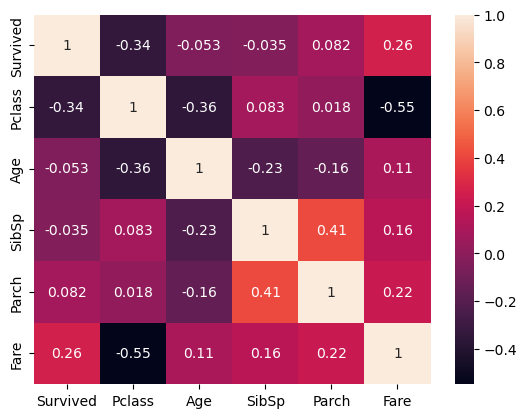

In [49]:
sns.heatmap(df.corr(),annot = True)

C:\Users\saisa\AppData\Local\Temp\ipykernel_17732\1541779687.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df["Pclass"],y=df["Fare"],ci=0)


<Axes: xlabel='Pclass', ylabel='Fare'>

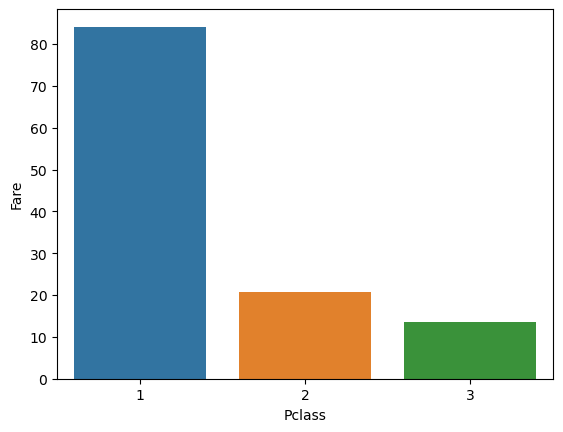

In [50]:
sns.barplot(x=df["Pclass"],y=df["Fare"],ci=0)

# 5.outlier detection

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

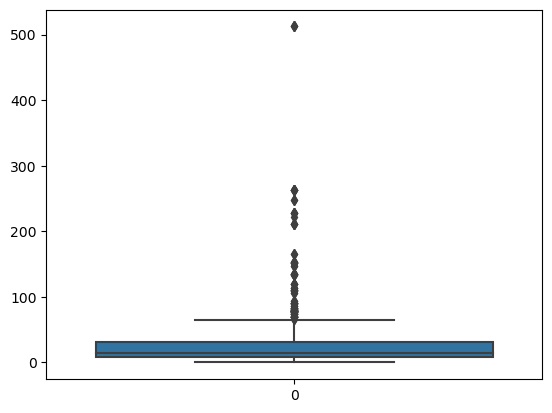

In [55]:
sns.boxplot(df["Fare"])

In [57]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
31,1,1,female,24.0,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C


In [58]:
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C


In [61]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

<Axes: >

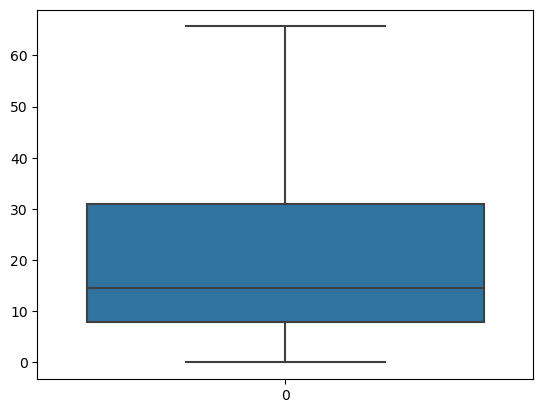

In [63]:
sns.boxplot(df['Fare'])

# 6.Splitting Dependent and independent variables

In [64]:
X=df.drop(columns=["Fare"],axis=1)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [65]:
y=df["Fare"]
y.head()

0     7.2500
1    65.6344
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

# 7.Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [67]:
X["Sex"]=le.fit_transform(X["Sex"])
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [68]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

In [71]:
X["Embarked"]=le.fit_transform(X["Embarked"])
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [72]:
print(le.classes_)

['C' 'Q' 'S']


In [73]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'C': 0, 'Q': 1, 'S': 2}

In [78]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# 8.Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()

In [74]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [75]:
X_Scaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,1.0


# 9.Train,test split

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [77]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)
